In [1]:
import os
import math
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

import preprocessing

In [2]:
data_dir = os.path.join(os.path.dirname(os.getcwd()), "data")
pat_num = 9

In [3]:
mar9 = preprocessing.load_mar_data(data_dir, pat_num)
sickbay9 = preprocessing.load_sickbay_data(data_dir, pat_num)
accel9 = preprocessing.load_accel_data(data_dir, pat_num)
accel9 = preprocessing.process_accel_data(accel9)
ecg9 = preprocessing.load_ecg_data(data_dir, pat_num)

In [4]:
print(mar9.head())
print(mar9.tail())

                 time  dose       mar_action  \
0 2024-01-11 01:48:00  60.0      ['New Bag']   
1 2024-01-11 02:00:00  60.0  ['Rate Verify']   
2 2024-01-11 03:00:00  60.0  ['Rate Verify']   
3 2024-01-11 03:19:00  80.0      ['New Bag']   
4 2024-01-11 04:00:00  60.0  ['Rate Verify']   

                                            med_name  
0  ['DEXTROSE 5 % AND 0.9 % SODIUM CHLORIDE INTRA...  
1  ['DEXTROSE 5 % AND 0.9 % SODIUM CHLORIDE INTRA...  
2  ['DEXTROSE 5 % AND 0.9 % SODIUM CHLORIDE INTRA...  
3  ['SULFAMETHOXAZOLE-TRIMETHOPRIM IV 0.8 MG/ML (...  
4  ['DEXTROSE 5 % AND 0.9 % SODIUM CHLORIDE INTRA...  
                    time   dose mar_action  \
2545 2024-02-07 08:19:00    1.0  ['Given']   
2546 2024-02-07 08:19:00  400.0  ['Given']   
2547 2024-02-07 08:20:00   10.0  ['Given']   
2548 2024-02-07 08:20:00  176.0  ['Given']   
2549 2024-02-07 09:40:00   17.0  ['Given']   

                                               med_name  
2545      ['DEXAMETHASONE 1 MG/ML DROPS (CONCE

In [5]:
print(sickbay9.head())
print(sickbay9.tail())

                 time  heart_rate  SpO2  respiratory_rate  \
0 2024-01-15 13:00:00        92.0  98.0              22.0   
1 2024-01-15 13:00:02        91.0  98.0              22.0   
2 2024-01-15 13:00:04        91.0  98.0              22.0   
3 2024-01-15 13:00:06        90.0  98.0              22.0   
4 2024-01-15 13:00:08        90.0  98.0              22.0   

   blood_pressure_systolic  blood_pressure_mean  blood_pressure_diastolic  
0                    114.0                 79.0                      56.0  
1                    114.0                 79.0                      56.0  
2                    114.0                 79.0                      56.0  
3                    114.0                 79.0                      56.0  
4                    114.0                 79.0                      56.0  
                      time  heart_rate  SpO2  respiratory_rate  \
389774 2024-01-24 15:36:34        86.0  96.0              17.0   
389775 2024-01-24 15:36:36        86.0  96.0 

In [9]:
print(accel9.head())
print(accel9.tail())

accel9.to_csv(os.path.join(data_dir, 'Patient9', "accel.csv"), index=False)

                  time         a
0  2024-01-15 12:20:00  1.011547
1  2024-01-15 12:20:01  1.011278
2  2024-01-15 12:20:02  1.010954
3  2024-01-15 12:20:03  1.010739
4  2024-01-15 12:20:04  1.010583
                       time         a
191176  2024-01-17 17:26:47  1.038303
191177  2024-01-17 17:26:48  1.040407
191178  2024-01-17 17:26:49  1.038118
191179  2024-01-17 17:26:50  1.027976
191180  2024-01-17 17:26:51  1.056479


In [7]:
print(ecg9.head())
print(ecg9.tail())

   sbs_score          start_time            end_time  \
0          1 2024-01-15 13:22:00 2024-01-15 13:37:00   
1          0 2024-01-15 13:50:00 2024-01-15 14:05:00   
2          1 2024-01-15 14:40:00 2024-01-15 14:55:00   
3          1 2024-01-15 15:32:00 2024-01-15 15:47:00   
4          0 2024-01-15 15:50:00 2024-01-15 16:05:00   

                                                ecg1  \
0  [[0.0102, 0.0306, 0.0408, 0.0408, 0.0306, 0.02...   
1  [[0.01785, 0.0204, 0.02295, 0.0255, 0.02805, 0...   
2  [[0.0, 0.0, -0.00255, -0.0051, -0.0051, -0.005...   
3  [[-0.02805, -0.02805, -0.02805, -0.02805, -0.0...   
4  [[0.01785, 0.0357, 0.0306, 0.01785, 0.00765, 0...   

                                                ecg2  \
0  [[0.0102, 0.03315, 0.0663, 0.0918, 0.0969, 0.0...   
1  [[0.04845, 0.04845, 0.051, 0.05355, 0.05865, 0...   
2  [[-0.00765, -0.00765, -0.0051, -0.0051, -0.005...   
3  [[-0.02805, -0.02805, -0.0306, -0.0306, -0.030...   
4  [[0.02295, 0.03315, 0.0306, 0.0204, 0.00765

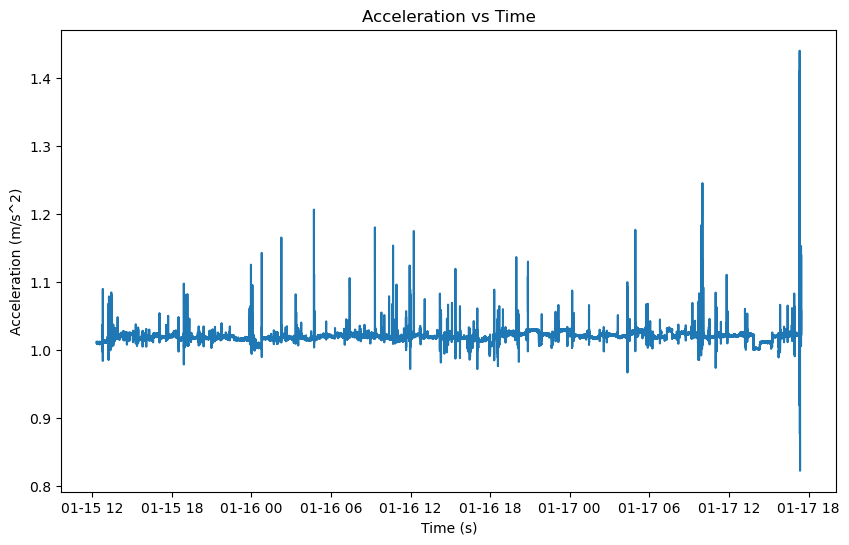

In [31]:
accel9_sample = accel9[['time', 'a']]

plt.figure(figsize=(10, 6))
plt.plot(accel9_sample['time'], accel9_sample['a'])
plt.title('Acceleration vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.show()


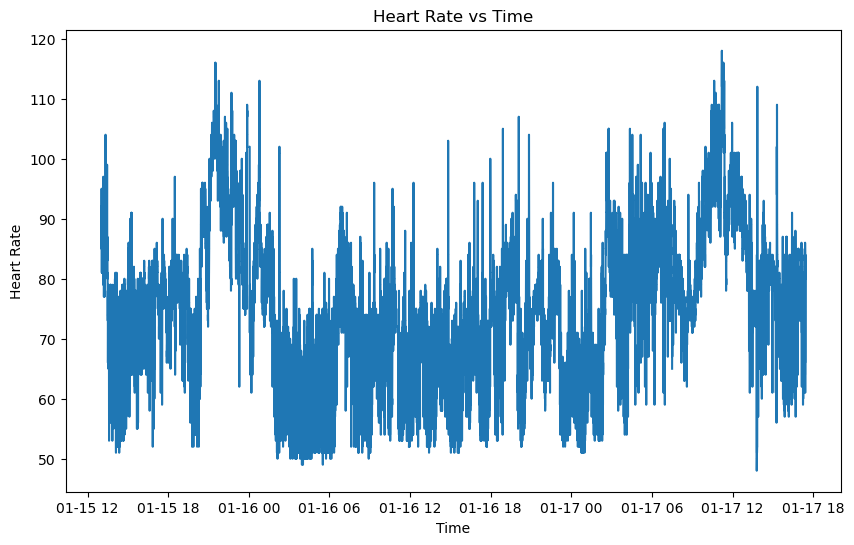

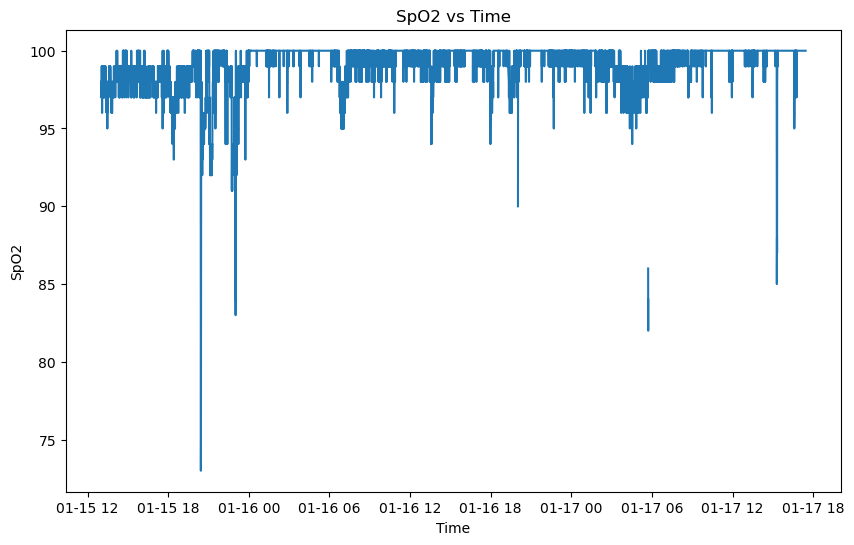

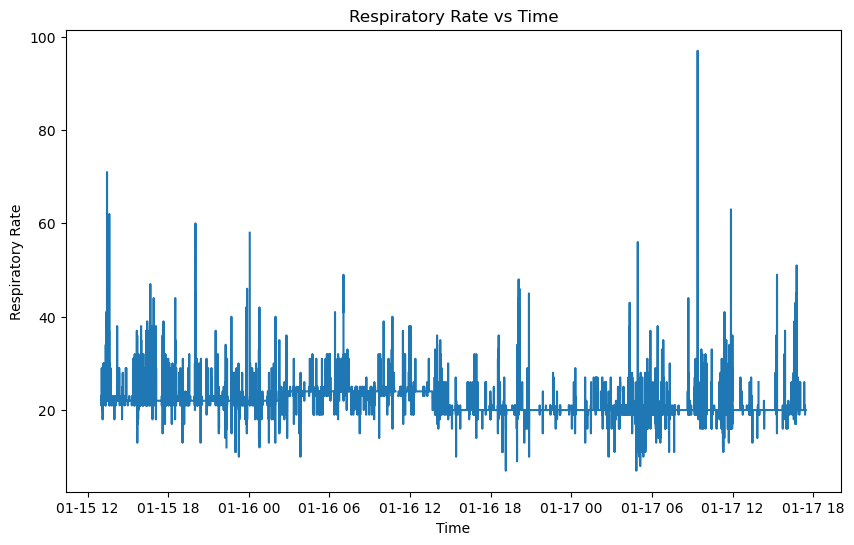

In [32]:
start = accel9['time'].iloc[0]
end = accel9['time'].iloc[-1]

heart_rate_sample = sickbay9[['time', 'heart_rate']]
heart_rate_sample = heart_rate_sample[(heart_rate_sample['time'] >= start) & (heart_rate_sample['time'] <= end)]

plt.figure(figsize=(10, 6))
plt.plot(heart_rate_sample['time'], heart_rate_sample['heart_rate'])
plt.title('Heart Rate vs Time')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.show()

SpO2_sample = sickbay9[['time', 'SpO2']]
SpO2_sample = SpO2_sample[(SpO2_sample['time'] >= start) & (SpO2_sample['time'] <= end)]

plt.figure(figsize=(10, 6))
plt.plot(SpO2_sample['time'], SpO2_sample['SpO2'])
plt.title('SpO2 vs Time')
plt.xlabel('Time')
plt.ylabel('SpO2')
plt.show()

respiratory_rate_sample = sickbay9[['time', 'respiratory_rate']]
respiratory_rate_sample = respiratory_rate_sample[(respiratory_rate_sample['time'] >= start) & (respiratory_rate_sample['time'] <= end)]

plt.figure(figsize=(10, 6))
plt.plot(respiratory_rate_sample['time'], respiratory_rate_sample['respiratory_rate'])
plt.title('Respiratory Rate vs Time')
plt.xlabel('Time')
plt.ylabel('Respiratory Rate')
plt.show()

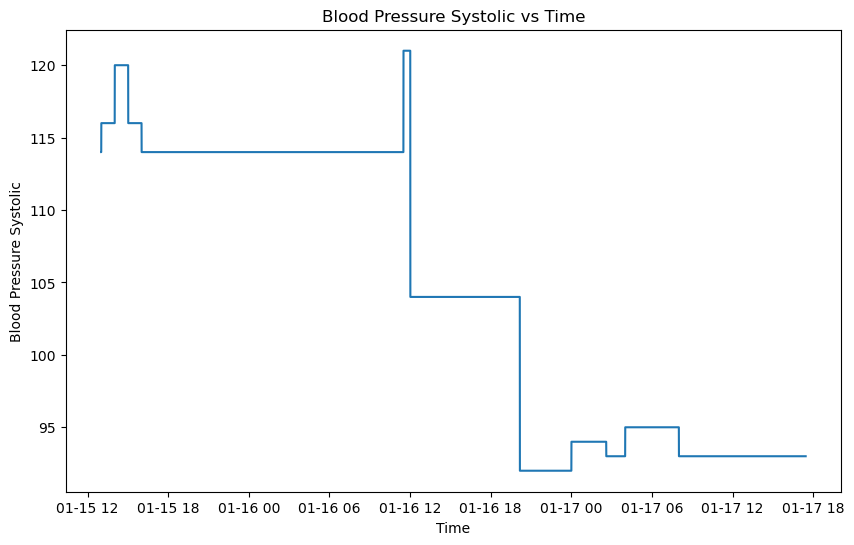

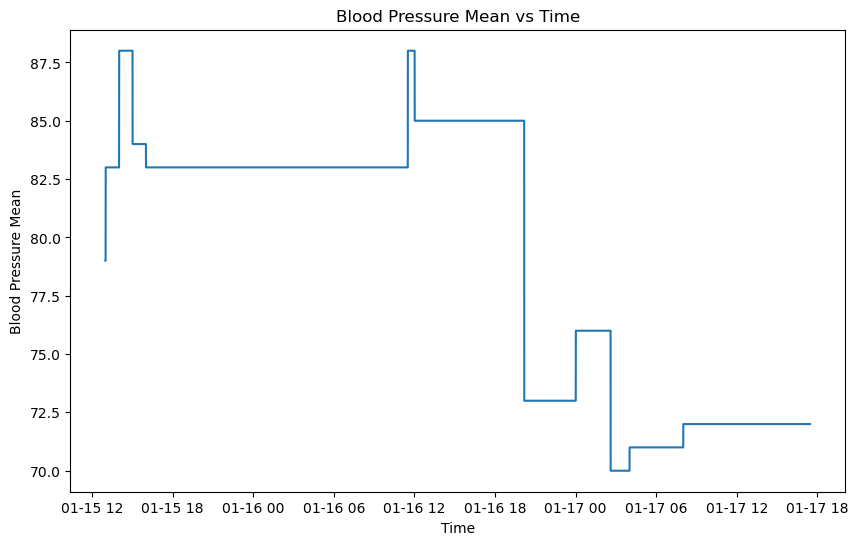

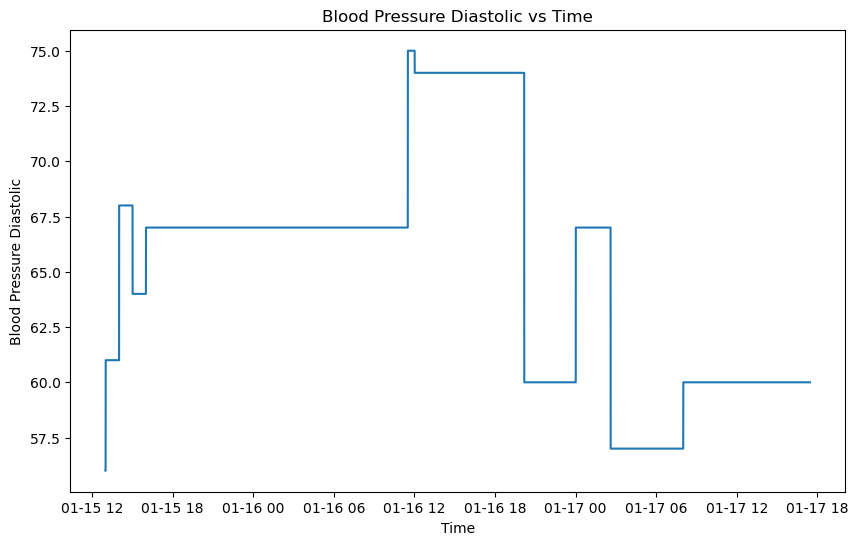

In [33]:
start = accel9['time'].iloc[0]
end = accel9['time'].iloc[-1]

blood_pressure_systolic_sample = sickbay9[['time', 'blood_pressure_systolic']]
blood_pressure_systolic_sample = blood_pressure_systolic_sample[(blood_pressure_systolic_sample['time'] >= start) & (blood_pressure_systolic_sample['time'] <= end)]

plt.figure(figsize=(10, 6))
plt.plot(blood_pressure_systolic_sample['time'], blood_pressure_systolic_sample['blood_pressure_systolic'])
plt.title('Blood Pressure Systolic vs Time')
plt.xlabel('Time')
plt.ylabel('Blood Pressure Systolic')
plt.show()

blood_pressure_mean_sample = sickbay9[['time', 'blood_pressure_mean']]
blood_pressure_mean_sample = blood_pressure_mean_sample[(blood_pressure_mean_sample['time'] >= start) & (blood_pressure_mean_sample['time'] <= end)]

plt.figure(figsize=(10, 6))
plt.plot(blood_pressure_mean_sample['time'], blood_pressure_mean_sample['blood_pressure_mean'])
plt.title('Blood Pressure Mean vs Time')
plt.xlabel('Time')
plt.ylabel('Blood Pressure Mean')
plt.show()

blood_pressure_diastolic_sample = sickbay9[['time', 'blood_pressure_diastolic']]
blood_pressure_diastolic_sample = blood_pressure_diastolic_sample[(blood_pressure_diastolic_sample['time'] >= start) & (blood_pressure_diastolic_sample['time'] <= end)]

plt.figure(figsize=(10, 6))
plt.plot(blood_pressure_diastolic_sample['time'], blood_pressure_diastolic_sample['blood_pressure_diastolic'])
plt.title('Blood Pressure Diastolic vs Time')
plt.xlabel('Time')
plt.ylabel('Blood Pressure Diastolic')
plt.show()

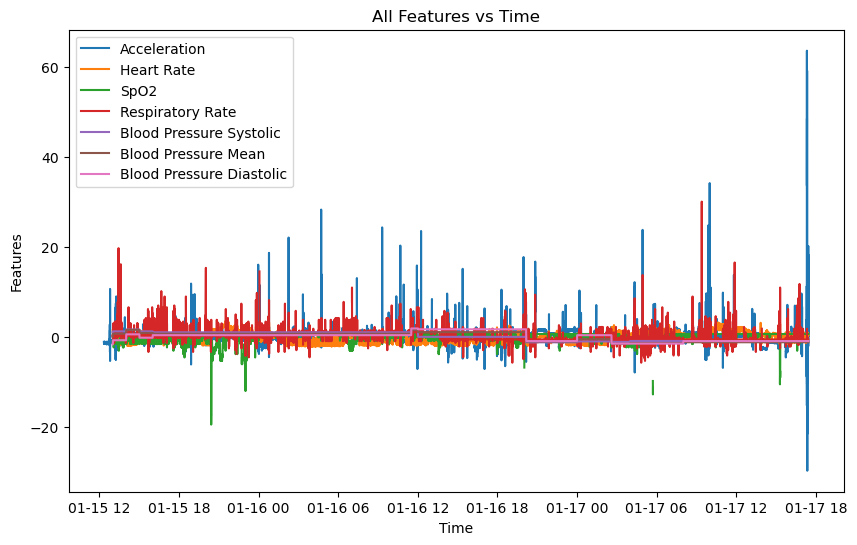

In [34]:
accel9_sample_standardized = accel9_sample.copy()
accel9_sample_standardized['a'] = (accel9_sample['a'] - accel9_sample['a'].mean()) / accel9_sample['a'].std()
heart_rate_sample_standardized = heart_rate_sample.copy()
heart_rate_sample_standardized['heart_rate'] = (heart_rate_sample['heart_rate'] - heart_rate_sample['heart_rate'].mean()) / heart_rate_sample['heart_rate'].std()
SpO2_sample_standardized = SpO2_sample.copy()
SpO2_sample_standardized['SpO2'] = (SpO2_sample['SpO2'] - SpO2_sample['SpO2'].mean()) / SpO2_sample['SpO2'].std()
respiratory_rate_sample_standardized = respiratory_rate_sample.copy()
respiratory_rate_sample_standardized['respiratory_rate'] = (respiratory_rate_sample['respiratory_rate'] - respiratory_rate_sample['respiratory_rate'].mean()) / respiratory_rate_sample['respiratory_rate'].std()
blood_pressure_systolic_sample_standardized = blood_pressure_systolic_sample.copy()
blood_pressure_systolic_sample_standardized['blood_pressure_systolic'] = (blood_pressure_systolic_sample['blood_pressure_systolic'] - blood_pressure_systolic_sample['blood_pressure_systolic'].mean()) / blood_pressure_systolic_sample['blood_pressure_systolic'].std()
blood_pressure_mean_sample_standardized = blood_pressure_mean_sample.copy()
blood_pressure_mean_sample_standardized['blood_pressure_mean'] = (blood_pressure_mean_sample['blood_pressure_mean'] - blood_pressure_mean_sample['blood_pressure_mean'].mean()) / blood_pressure_mean_sample['blood_pressure_mean'].std()
blood_pressure_diastolic_sample_standardized = blood_pressure_diastolic_sample.copy()
blood_pressure_diastolic_sample_standardized['blood_pressure_diastolic'] = (blood_pressure_diastolic_sample['blood_pressure_diastolic'] - blood_pressure_diastolic_sample['blood_pressure_diastolic'].mean()) / blood_pressure_diastolic_sample['blood_pressure_diastolic'].std()

plt.figure(figsize=(10, 6))
plt.plot(accel9_sample_standardized['time'], accel9_sample_standardized['a'])
plt.plot(heart_rate_sample_standardized['time'], heart_rate_sample_standardized['heart_rate'])
plt.plot(SpO2_sample_standardized['time'], SpO2_sample_standardized['SpO2'])
plt.plot(respiratory_rate_sample_standardized['time'], respiratory_rate_sample_standardized['respiratory_rate'])
plt.plot(blood_pressure_systolic_sample_standardized['time'], blood_pressure_systolic_sample_standardized['blood_pressure_systolic'])
plt.plot(blood_pressure_mean_sample_standardized['time'], blood_pressure_mean_sample_standardized['blood_pressure_mean'])
plt.plot(blood_pressure_diastolic_sample_standardized['time'], blood_pressure_diastolic_sample_standardized['blood_pressure_diastolic'])
plt.legend(['Acceleration', 'Heart Rate', 'SpO2', 'Respiratory Rate', 'Blood Pressure Systolic', 'Blood Pressure Mean', 'Blood Pressure Diastolic'])
plt.title('All Features vs Time')
plt.xlabel('Time')
plt.ylabel('Features')
plt.show()

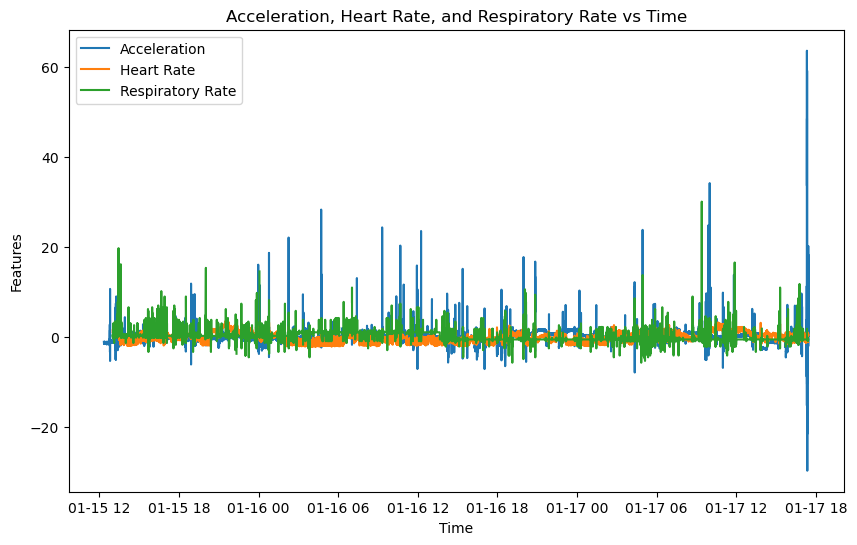

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(accel9_sample_standardized['time'], accel9_sample_standardized['a'])
plt.plot(heart_rate_sample_standardized['time'], heart_rate_sample_standardized['heart_rate'])
plt.plot(respiratory_rate_sample_standardized['time'], respiratory_rate_sample_standardized['respiratory_rate'])
plt.legend(['Acceleration', 'Heart Rate', 'Respiratory Rate'])
plt.title('Acceleration, Heart Rate, and Respiratory Rate vs Time')
plt.xlabel('Time')
plt.ylabel('Features')
plt.show()

In [11]:
agents = ['propofol', 'dexmedetomidine', 'midazolam', 'ketamine', 'diazepam', 'lidocaine', 'clonidine', 'hydroxyzine', 'diphenhydramine', 'fentanyl', 'hydromorphone', 'morphine', 'methadone', 'nalbuphine', 'acetaminophen']
pattern = '|'.join(agents)
filtered_mar9 = mar9[mar9['med_name'].str.lower().str.contains(pattern, regex=True)]
filtered_mar9 = filtered_mar9[~filtered_mar9['mar_action'].str.contains('Missed')]
filtered_mar9 = filtered_mar9.dropna(subset=['dose'])

bolus = filtered_mar9[filtered_mar9['med_name'].str.contains('bolus', case=False, regex=True)]

In [9]:
# start = accel9['time'].iloc[0]
# end = accel9['time'].iloc[-1]

# bolus_sample = bolus[(bolus['time'] >= start) & (bolus['time'] <= end)]

# plt.figure(figsize=(10, 6))
# plt.plot(accel9_sample['time'], accel9_sample['a'])
# for bolus_time in bolus_sample['time']:
#     plt.axvline(x=bolus_time, color='red', linestyle='--')
# plt.title('Acceleration vs Time with Bolus Doses')
# plt.xlabel('Time')
# plt.ylabel('Acceleration')
# plt.show()

# plt.figure(figsize=(10, 6))
# plt.plot(heart_rate_sample['time'], heart_rate_sample['heart_rate'])
# for bolus_time in bolus_sample['time']:
#     plt.axvline(x=bolus_time, color='red', linestyle='--')
# plt.title('Heart Rate vs Time with Bolus Doses')
# plt.xlabel('Time')
# plt.ylabel('Heart Rate')
# plt.show()

# start = accel9['time'].iloc[0]
# end = accel9['time'].iloc[-1]

# bolus_sample = bolus[(bolus['time'] >= start) & (bolus['time'] <= end)]

# plt.figure(figsize=(10, 6))
# plt.plot(respiratory_rate_sample['time'], respiratory_rate_sample['respiratory_rate'])
# for bolus_time in bolus_sample['time']:
#     plt.axvline(x=bolus_time, color='red', linestyle='--')
# plt.title('Respiratory Rate vs Time with Bolus Doses')
# plt.xlabel('Time')
# plt.ylabel('Respiratory Rate')
# plt.show()

In [12]:
# start = accel9['time'].iloc[0]
# end = accel9['time'].iloc[-1]

# bolus_sample = bolus[(bolus['time'] >= start) & (bolus['time'] <= end)]

# plt.figure(figsize=(10, 6))
# plt.plot(accel9_sample_standardized['time'], accel9_sample_standardized['a'])
# plt.plot(heart_rate_sample_standardized['time'], heart_rate_sample_standardized['heart_rate'])
# plt.plot(respiratory_rate_sample_standardized['time'], respiratory_rate_sample_standardized['respiratory_rate'])
# for bolus_time in bolus_sample['time']:
#     plt.axvline(x=bolus_time, color='red', linestyle='--')
# plt.legend(['Acceleration', 'Heart Rate', 'Respiratory Rate'])
# plt.title('Acceleration, Heart Rate, and Respiratory Rate vs Time with Bolus Doses')
# plt.xlabel('Time')
# plt.ylabel('Features')
# plt.show()

In [8]:
# for i in range(0, len(accel9)-10000, 10000):
#     start_sample = accel9['time'].iloc[i]
#     end_sample = accel9['time'].iloc[i+10000]

#     accel9_sample_standardized_sample = accel9_sample_standardized[(accel9_sample_standardized['time'] >= start_sample) & (accel9_sample_standardized['time'] <= end_sample)]
#     bolus_sample = bolus[(bolus['time'] >= start_sample) & (bolus['time'] <= end_sample)]

#     plt.figure(figsize=(10, 6))
#     plt.plot(accel9_sample_standardized_sample['time'], accel9_sample_standardized_sample['a'])
#     for bolus_time in bolus_sample['time']:
#         plt.axvline(x=bolus_time, color='red', linestyle='--')
#     plt.ylim(-15, 15)
#     plt.title('Acceleration vs Time with Bolus Doses')
#     plt.xlabel('Time')
#     plt.ylabel('Acceleration')
#     plt.show()

In [7]:
# for i in range(0, len(accel9)-10000, 10000):
#     start_sample = accel9['time'].iloc[i]
#     end_sample = accel9['time'].iloc[i+10000]

#     heart_rate_sample_standardized_sample = heart_rate_sample_standardized[(heart_rate_sample_standardized['time'] >= start_sample) & (heart_rate_sample_standardized['time'] <= end_sample)]
#     bolus_sample = bolus[(bolus['time'] >= start_sample) & (bolus['time'] <= end_sample)]

#     plt.figure(figsize=(10, 6))
#     plt.plot(heart_rate_sample_standardized_sample['time'], heart_rate_sample_standardized_sample['heart_rate'])
#     for bolus_time in bolus_sample['time']:
#         plt.axvline(x=bolus_time, color='red', linestyle='--')
#     plt.ylim(-3, 3)
#     plt.title('Heart Rate vs Time with Bolus Doses')
#     plt.xlabel('Time')
#     plt.ylabel('Heart Rate')
#     plt.show()

In [6]:
# for i in range(0, len(accel9)-10000, 10000):
#     start_sample = accel9['time'].iloc[i]
#     end_sample = accel9['time'].iloc[i+10000]

#     blood_pressure_mean_sample_sample = blood_pressure_mean_sample[(blood_pressure_mean_sample['time'] >= start_sample) & (blood_pressure_mean_sample['time'] <= end_sample)]
#     bolus_sample = bolus[(bolus['time'] >= start_sample) & (bolus['time'] <= end_sample)]

#     plt.figure(figsize=(10, 6))
#     plt.plot(blood_pressure_mean_sample_sample['time'], blood_pressure_mean_sample_sample['blood_pressure_mean'])
#     for bolus_time in bolus_sample['time']:
#         plt.axvline(x=bolus_time, color='red', linestyle='--')
#     plt.ylim(70, 90)
#     plt.title('Blood Pressure Mean vs Time with Bolus Doses')
#     plt.xlabel('Time')
#     plt.ylabel('Blood Pressure Mean')
#     plt.show()

In [10]:
# for i in range(0, len(accel9)-10000, 10000):
#     start_sample = accel9['time'].iloc[i]
#     end_sample = accel9['time'].iloc[i+10000]

#     accel9_sample_standardized_sample = accel9_sample_standardized[(accel9_sample_standardized['time'] >= start_sample) & (accel9_sample_standardized['time'] <= end_sample)]
#     heart_rate_sample_standardized_sample = heart_rate_sample_standardized[(heart_rate_sample_standardized['time'] >= start_sample) & (heart_rate_sample_standardized['time'] <= end_sample)]
#     respiratory_rate_sample_standardized_sample = respiratory_rate_sample_standardized[(respiratory_rate_sample_standardized['time'] >= start_sample) & (respiratory_rate_sample_standardized['time'] <= end_sample)]
#     bolus_sample = bolus[(bolus['time'] >= start_sample) & (bolus['time'] <= end_sample)]

#     plt.figure(figsize=(10, 6))
#     plt.plot(accel9_sample_standardized_sample['time'], accel9_sample_standardized_sample['a'])
#     plt.plot(heart_rate_sample_standardized_sample['time'], heart_rate_sample_standardized_sample['heart_rate'])
#     plt.plot(respiratory_rate_sample_standardized_sample['time'], respiratory_rate_sample_standardized_sample['respiratory_rate'])
#     for bolus_time in bolus_sample['time']:
#         plt.axvline(x=bolus_time, color='red', linestyle='--')
#     plt.ylim(-15, 15)
#     plt.legend(['Acceleration', 'Heart Rate', 'Respiratory Rate'])
#     plt.title('Acceleration, Heart Rate, and Respiratory Rate vs Time with Bolus Doses')
#     plt.xlabel('Time')
#     plt.ylabel('Features (z-score)')
#     plt.show()

In [12]:
filtered_mar9 = filtered_mar9.reset_index(drop=True)
display(filtered_mar9.head())

,time,dose,mar_action,med_name
0,2024-01-12 19:00:00,9.9,['Given'],['DEXMEDETOMIDINE BOLUS FROM BAG (JHH PEDS)']
1,2024-01-12 19:01:00,20.0,['Given'],['PROPOFOL 10 MG/ML INTRAVENOUS EMULSION']
2,2024-01-12 19:09:00,0.5,['New Bag'],['FENTANYL INFUSION 50 MCG/ML (JHH PED)']
3,2024-01-12 19:15:00,1.0,['New Bag'],['FENTANYL INFUSION 50 MCG/ML (JHH PED)']
4,2024-01-12 19:19:00,0.3,['New Bag'],['DEXMEDETOMIDINE INFUSION 4 MCG/ML (JHH PED)']


In [13]:
narcotics = ['fentanyl', 'morphine', 'hydromorphone', 'oxycodone', 'methadone', 'remifentanil']
paralytics = ['rocuronium', 'vecuronium', 'succinylcholine', 'cisatracurium']
alpha_agonists = ['dexmedetomidine', 'clonidine']
ketamines = ['ketamine']
propofols = ['propofol']
etomidates = ['etomidate']
benzodiazepines = ['midazolam', 'diazepam', 'lorazepam']

narcotics_pattern = '|'.join(narcotics)
paralytics_pattern = '|'.join(paralytics)
alpha_agonists_pattern = '|'.join(alpha_agonists)
ketamines_pattern = '|'.join(ketamines)
propofols_pattern = '|'.join(propofols)
etomidates_pattern = '|'.join(etomidates)
benzodiazepines_pattern = '|'.join(benzodiazepines)

filtered_mar9_narcotics = filtered_mar9[filtered_mar9['med_name'].str.lower().str.contains(narcotics_pattern, regex=True)].reset_index(drop=True)
filtered_mar9_paralytics = filtered_mar9[filtered_mar9['med_name'].str.lower().str.contains(paralytics_pattern, regex=True)].reset_index(drop=True)
filtered_mar9_alpha_agonists = filtered_mar9[filtered_mar9['med_name'].str.lower().str.contains(alpha_agonists_pattern, regex=True)].reset_index(drop=True)
filtered_mar9_ketamines = filtered_mar9[filtered_mar9['med_name'].str.lower().str.contains(ketamines_pattern, regex=True)].reset_index(drop=True)
filtered_mar9_propofols = filtered_mar9[filtered_mar9['med_name'].str.lower().str.contains(propofols_pattern, regex=True)].reset_index(drop=True)
filtered_mar9_etomidates = filtered_mar9[filtered_mar9['med_name'].str.lower().str.contains(etomidates_pattern, regex=True)].reset_index(drop=True)
filtered_mar9_benzodiazepines = filtered_mar9[filtered_mar9['med_name'].str.lower().str.contains(benzodiazepines_pattern, regex=True)].reset_index(drop=True)

print(filtered_mar9_narcotics.shape)
print(filtered_mar9_paralytics.shape)
print(filtered_mar9_alpha_agonists.shape)
print(filtered_mar9_ketamines.shape)
print(filtered_mar9_propofols.shape)
print(filtered_mar9_etomidates.shape)
print(filtered_mar9_benzodiazepines.shape)

(414, 4)
(0, 4)
(44, 4)
(9, 4)
(41, 4)
(0, 4)
(290, 4)


In [40]:
benzodiazepine_equivs = {
    'midazolam': 5,
    'diazepam': 2.5,
    'lorazepam': 1
}

equivs = []
orals = []

for row in filtered_mar9_benzodiazepines.itertuples():
    med_name_lower = row.med_name.lower()
    if 'midazolam' in med_name_lower:
        equiv = row.dose * benzodiazepine_equivs['midazolam']
    elif 'diazepam' in med_name_lower:
        equiv = row.dose * benzodiazepine_equivs['diazepam']
    elif 'lorazepam' in med_name_lower:
        equiv = row.dose * benzodiazepine_equivs['lorazepam']
    else:
        equiv = -1  # Assign -1 for unknown medications

    if 'oral' in med_name_lower:
        oral = True
    else:
        oral = False

    equivs.append(equiv)
    orals.append(oral)

filtered_mar9_benzodiazepines['equivs'] = equivs
filtered_mar9_benzodiazepines['oral'] = orals

display(filtered_mar9_benzodiazepines)


,time,dose,mar_action,med_name,equivs,oral
0,2024-01-13 00:40:00,1.0,['Given'],['MIDAZOLAM 1 MG/ML INJECTION SOLUTION JHM'],5.0,False
1,2024-01-13 05:15:00,1.0,['Given'],['MIDAZOLAM 1 MG/ML INJECTION SOLUTION JHM'],5.0,False
2,2024-01-13 15:05:00,1.0,['Given'],['MIDAZOLAM 1 MG/ML INJECTION SOLUTION JHM'],5.0,False
3,2024-01-13 21:03:00,1.0,['Given'],['MIDAZOLAM 1 MG/ML INJECTION SOLUTION JHM'],5.0,False
4,2024-01-14 06:36:00,1.0,['Given'],['MIDAZOLAM 1 MG/ML INJECTION SOLUTION JHM'],5.0,False
...,...,...,...,...,...,...
285,2024-01-25 10:36:00,2.0,['Given'],['DIAZEPAM 5 MG/5 ML (1 MG/ML) ORAL SOLUTION'],5.0,True
286,2024-01-25 18:06:00,2.0,['Given'],['DIAZEPAM 5 MG/5 ML (1 MG/ML) ORAL SOLUTION'],5.0,True
287,2024-01-26 02:13:00,2.0,['Given'],['DIAZEPAM 5 MG/5 ML (1 MG/ML) ORAL SOLUTION'],5.0,True
288,2024-01-26 14:13:00,2.0,['Given'],['DIAZEPAM 5 MG/5 ML (1 MG/ML) ORAL SOLUTION'],5.0,True


In [20]:
start = accel9['time'].iloc[0]
end = accel9['time'].iloc[-1]

midazolam_df = filtered_mar9_benzodiazepines[filtered_mar9_benzodiazepines['med_name'].str.lower().str.contains('midazolam')].reset_index(drop=True)
midazolam_df = midazolam_df[(midazolam_df['time'] >= start) & (midazolam_df['time'] <= end)]
midazolam_rate = pd.DataFrame({'time': pd.date_range(start=start, end=end, freq='T')})

diazepam_df = filtered_mar9_benzodiazepines[filtered_mar9_benzodiazepines['med_name'].str.lower().str.contains('diazepam')].reset_index(drop=True)
diazepam_df = diazepam_df[(diazepam_df['time'] >= start) & (diazepam_df['time'] <= end)]
diazepam_rate = pd.DataFrame({'time': pd.date_range(start=start, end=end, freq='T')})

lorazepam_df = filtered_mar9_benzodiazepines[filtered_mar9_benzodiazepines['med_name'].str.lower().str.contains('lorazepam')].reset_index(drop=True)
lorazepam_df = lorazepam_df[(lorazepam_df['time'] >= start) & (lorazepam_df['time'] <= end)]
lorazepam_rate = pd.DataFrame({'time': pd.date_range(start=start, end=end, freq='T')})

display(midazolam_df)
display(diazepam_df)
display(lorazepam_df)

,time,dose,mar_action,med_name,equivs,oral
9,2024-01-15 14:50:00,0.490,['Given'],['MIDAZOLAM 1 MG/ML INJECTION SOLUTION JHM'],2.450,False
10,2024-01-15 16:01:00,0.020,['New Bag'],['MIDAZOLAM INFUSION 1 MG/ML (JHH PED)'],0.100,False
11,2024-01-15 17:00:00,0.020,['Rate Verify'],['MIDAZOLAM INFUSION 1 MG/ML (JHH PED)'],0.100,False
12,2024-01-15 18:00:00,0.020,['Rate Verify'],['MIDAZOLAM INFUSION 1 MG/ML (JHH PED)'],0.100,False
13,2024-01-15 19:00:00,0.020,['Rate Verify'],['MIDAZOLAM INFUSION 1 MG/ML (JHH PED)'],0.100,False
...,...,...,...,...,...,...
85,2024-01-17 14:00:00,0.030,['Rate Verify'],['MIDAZOLAM INFUSION 1 MG/ML (JHH PED)'],0.150,False
86,2024-01-17 15:00:00,0.030,['Rate Verify'],['MIDAZOLAM INFUSION 1 MG/ML (JHH PED)'],0.150,False
87,2024-01-17 16:00:00,0.030,['Rate Verify'],['MIDAZOLAM INFUSION 1 MG/ML (JHH PED)'],0.150,False
88,2024-01-17 16:20:00,0.591,['Given'],['MIDAZOLAM BOLUS FROM BAG (JHH PEDS)'],2.955,False


,time,dose,mar_action,med_name,equivs,oral
0,2024-01-16 23:35:00,1.00,['Given'],['DIAZEPAM 5 MG/ML INJECTION SYRINGE'],2.500,False
1,2024-01-17 06:15:00,1.95,['Given'],['DIAZEPAM 5 MG/ML INJECTION SYRINGE'],4.875,False
2,2024-01-17 11:05:00,1.95,['Given'],['DIAZEPAM 5 MG/ML INJECTION SYRINGE'],4.875,False
3,2024-01-17 16:56:00,1.95,['Given'],['DIAZEPAM 5 MG/ML INJECTION SYRINGE'],4.875,False


,time,dose,mar_action,med_name,equivs,oral


In [20]:
def calculate_doses(df):
    """
    Calculate the doses of continuous and bolus medications over time.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing time, dose, and mar_action columns.

    Returns:
        pd.DataFrame: DataFrame with time, dose, continuous_dose, and bolus_dose columns.
    """
    dose_df = pd.DataFrame({'time': pd.date_range(start=df['time'].iloc[0], end=df['time'].iloc[-1], freq='T')})

    doses = []
    continuous_doses = []
    bolus_doses = []

    index = 0
    continuous_dose = 0

    for i in range(len(dose_df)):
        bolus_dose = 0

        if dose_df['time'].iloc[i] == df['time'].iloc[index]:
            if 'Given' in df['mar_action'].iloc[index]:
                bolus_dose = df['dose'].iloc[index]
            else:
                continuous_dose = df['dose'].iloc[index] / 60
            index += 1
        
        rate = continuous_dose + bolus_dose
        doses.append(rate)
        continuous_doses.append(continuous_dose)
        bolus_doses.append(bolus_dose)

    dose_df['dose'] = doses
    dose_df['continuous_dose'] = continuous_doses
    dose_df['bolus_dose'] = bolus_doses

    return dose_df

In [22]:
midazolam_doses = calculate_doses(midazolam_df)
diazepam_doses = calculate_doses(diazepam_df)
# lorazepam_doses = calculate_doses(lorazepam_df)

In [19]:
benzodiazepine_half_lives = {
    'midazolam': 1.3,
    'diazepam': 18,
    'lorazepam': 14
}

benzodiazepine_elimination_rates = {med: np.log(2) / (half_life * 60) for med, half_life in benzodiazepine_half_lives.items()}

def calculate_concentrations(df, elimination_rate, start_time=None, end_time=None):
    """
    Calculate the drug concentration over time based on the elimination rate and dosing regimen.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing time and dose information.
        elimination_rate (float): The elimination rate of the drug.
        start_time (str): Start time for the calculation (optional).
        end_time (str): End time for the calculation (optional).
    
    Returns:
        pd.DataFrame: DataFrame with calculated drug concentrations over time.
    """
    if start_time is None:
        start_time = df['time'].iloc[0]
    if end_time is None:
        end_time = df['time'].iloc[-1]
    
    concentration_df = pd.DataFrame({'time': pd.date_range(start=start_time, end=end_time, freq='T')})
    concentration_df = concentration_df.merge(df[['time', 'dose', 'continuous_dose', 'bolus_dose']], on='time', how='left')
    concentration_df[['dose', 'continuous_dose', 'bolus_dose']] = concentration_df[['dose', 'continuous_dose', 'bolus_dose']].fillna(0)

    concentrations = [concentration_df['dose'].iloc[0]]

    for i in range(1, len(concentration_df)):
        concentration = concentration_df['dose'].iloc[i] + np.exp(-elimination_rate) * concentrations[-1]
        concentrations.append(concentration)

    concentration_df['concentration'] = concentrations

    return concentration_df

In [25]:
midazolam_concentrations = calculate_concentrations(midazolam_doses, benzodiazepine_elimination_rates['midazolam'], start, end)
diazepam_concentrations = calculate_concentrations(diazepam_doses, benzodiazepine_elimination_rates['diazepam'], start, end)

equiv_concentrations = (
    midazolam_concentrations['concentration'] * benzodiazepine_equivs['midazolam'] +
    diazepam_concentrations['concentration'] * benzodiazepine_equivs['diazepam'])

equiv_concentrations = pd.DataFrame({'time': midazolam_concentrations['time'], 'concentration': equiv_concentrations})

display(midazolam_concentrations)
display(diazepam_concentrations)
display(equiv_concentrations)

,time,dose,continuous_dose,bolus_dose,concentration
0,2024-01-15 12:20:00,0.0,0.0,0.0,0.000000
1,2024-01-15 12:21:00,0.0,0.0,0.0,0.000000
2,2024-01-15 12:22:00,0.0,0.0,0.0,0.000000
3,2024-01-15 12:23:00,0.0,0.0,0.0,0.000000
4,2024-01-15 12:24:00,0.0,0.0,0.0,0.000000
...,...,...,...,...,...
3182,2024-01-17 17:22:00,0.0,0.0,0.0,0.030986
3183,2024-01-17 17:23:00,0.0,0.0,0.0,0.030712
3184,2024-01-17 17:24:00,0.0,0.0,0.0,0.030440
3185,2024-01-17 17:25:00,0.0,0.0,0.0,0.030171


,time,dose,continuous_dose,bolus_dose,concentration
0,2024-01-15 12:20:00,0.0,0.0,0.0,0.000000
1,2024-01-15 12:21:00,0.0,0.0,0.0,0.000000
2,2024-01-15 12:22:00,0.0,0.0,0.0,0.000000
3,2024-01-15 12:23:00,0.0,0.0,0.0,0.000000
4,2024-01-15 12:24:00,0.0,0.0,0.0,0.000000
...,...,...,...,...,...
3182,2024-01-17 17:22:00,0.0,0.0,0.0,5.223768
3183,2024-01-17 17:23:00,0.0,0.0,0.0,5.220417
3184,2024-01-17 17:24:00,0.0,0.0,0.0,5.217067
3185,2024-01-17 17:25:00,0.0,0.0,0.0,5.213720


,time,concentration
0,2024-01-15 12:20:00,0.000000
1,2024-01-15 12:21:00,0.000000
2,2024-01-15 12:22:00,0.000000
3,2024-01-15 12:23:00,0.000000
4,2024-01-15 12:24:00,0.000000
...,...,...
3182,2024-01-17 17:22:00,13.214352
3183,2024-01-17 17:23:00,13.204603
3184,2024-01-17 17:24:00,13.194871
3185,2024-01-17 17:25:00,13.185156


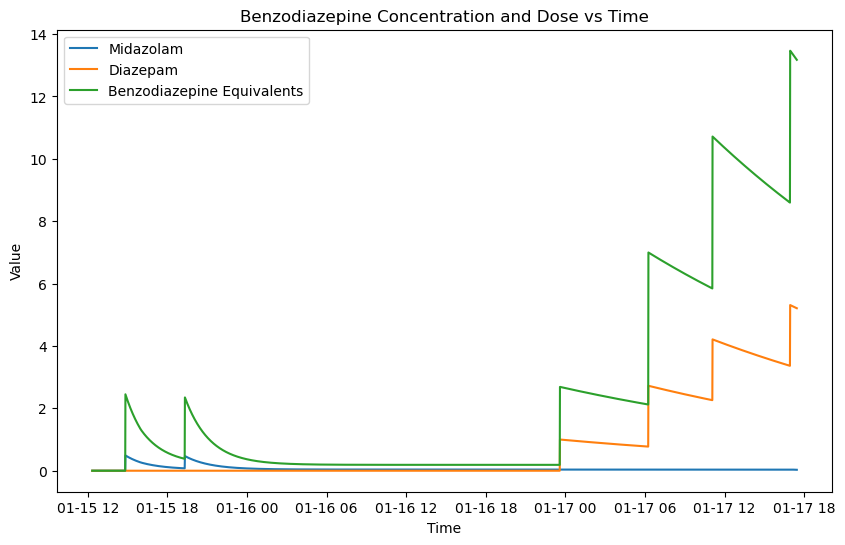

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(midazolam_concentrations['time'], midazolam_concentrations['concentration'], label='Midazolam')
plt.plot(diazepam_concentrations['time'], diazepam_concentrations['concentration'], label='Diazepam')
plt.plot(equiv_concentrations['time'], equiv_concentrations['concentration'], label='Benzodiazepine Equivalents')
plt.title('Benzodiazepine Concentration and Dose vs Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [43]:
# for i in range(0, len(accel9)-10000, 10000):
#     start_sample = accel9['time'].iloc[i]
#     end_sample = accel9['time'].iloc[i+10000]

#     accel9_sample_standardized_sample = accel9_sample_standardized[(accel9_sample_standardized['time'] >= start_sample) & (accel9_sample_standardized['time'] <= end_sample)]
#     heart_rate_sample_standardized_sample = heart_rate_sample_standardized[(heart_rate_sample_standardized['time'] >= start_sample) & (heart_rate_sample_standardized['time'] <= end_sample)]
#     respiratory_rate_sample_standardized_sample = respiratory_rate_sample_standardized[(respiratory_rate_sample_standardized['time'] >= start_sample) & (respiratory_rate_sample_standardized['time'] <= end_sample)]
#     midazolam_sample = midazolam_concentrations[(midazolam_concentrations['time'] >= start_sample) & (midazolam_concentrations['time'] <= end_sample)]
#     diazepam_sample = diazepam_concentrations[(diazepam_concentrations['time'] >= start_sample) & (diazepam_concentrations['time'] <= end_sample)]
#     equiv_sample = equiv_concentrations[(equiv_concentrations['time'] >= start_sample) & (equiv_concentrations['time'] <= end_sample)]

#     plt.figure(figsize=(10, 6))
#     plt.plot(accel9_sample_standardized_sample['time'], accel9_sample_standardized_sample['a'])
#     plt.plot(heart_rate_sample_standardized_sample['time'], heart_rate_sample_standardized_sample['heart_rate'])
#     plt.plot(respiratory_rate_sample_standardized_sample['time'], respiratory_rate_sample_standardized_sample['respiratory_rate'])
#     plt.plot(midazolam_sample['time'], midazolam_sample['concentration'])
#     plt.plot(diazepam_sample['time'], diazepam_sample['concentration'])
#     plt.plot(equiv_sample['time'], equiv_sample['concentration'])
#     plt.ylim(-15, 15)
#     plt.legend(['Acceleration', 'Heart Rate', 'Respiratory Rate', 'Midazolam', 'Diazepam', 'Benzodiazepine Equivalents'])
#     plt.title('Acceleration, Heart Rate, and Respiratory Rate vs Time with Benzodiazepines')
#     plt.xlabel('Time')
#     plt.ylabel('Features (z-score)')
#     plt.show()

In [44]:
for df in [accel9_sample_standardized, heart_rate_sample_standardized,
           respiratory_rate_sample_standardized, midazolam_concentrations,
           diazepam_concentrations, equiv_concentrations]:
    df['time'] = pd.to_datetime(df['time'])

accel_resampled = accel9_sample_standardized.set_index('time').resample('T').mean().rename(columns={'a': 'acceleration'})
hr_resampled = heart_rate_sample_standardized.set_index('time').resample('T').mean()
rr_resampled = respiratory_rate_sample_standardized.set_index('time').resample('T').mean()
midazolam_resampled = midazolam_concentrations.set_index('time')[['concentration']].rename(columns={'concentration': 'midazolam'})
diazepam_resampled = diazepam_concentrations.set_index('time')[['concentration']].rename(columns={'concentration': 'diazepam'})
benzodiazepine_resampled = equiv_concentrations.set_index('time')[['concentration']].rename(columns={'concentration': 'benzodiazepine_equivalents'})

df_merged = pd.concat([accel_resampled, hr_resampled, rr_resampled, midazolam_resampled, diazepam_resampled, benzodiazepine_resampled], axis=1, join='inner')

corr_matrix = df_merged.corr()
display(corr_matrix)

,acceleration,heart_rate,respiratory_rate,midazolam,diazepam,benzodiazepine_equivalents
acceleration,1.000000,-0.020375,-0.119104,-0.082725,0.061250,0.052850
heart_rate,-0.020375,1.000000,-0.205945,0.138416,0.354121,0.376839
respiratory_rate,-0.119104,-0.205945,1.000000,0.160720,-0.392338,-0.381168
midazolam,-0.082725,0.138416,0.160720,1.000000,-0.217831,-0.106477
diazepam,0.061250,0.354121,-0.392338,-0.217831,1.000000,0.993632
benzodiazepine_equivalents,0.052850,0.376839,-0.381168,-0.106477,0.993632,1.000000


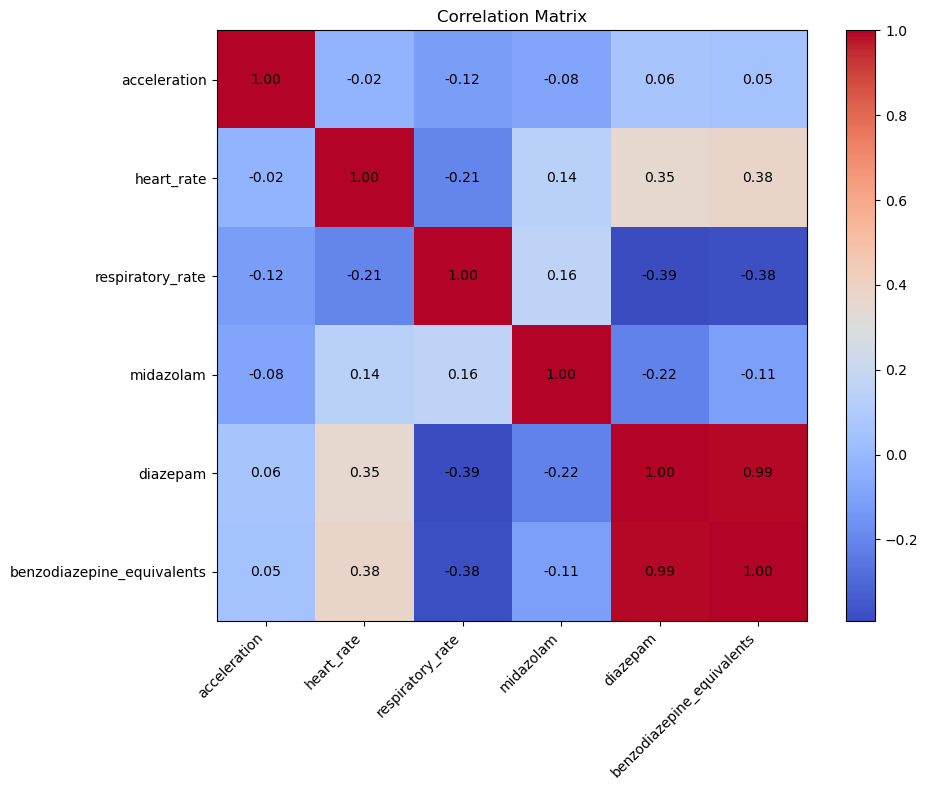

In [41]:
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [57]:
sbs_score_df = preprocessing.load_retro_data(data_dir, pat_num)
sbs_score_df = sbs_score_df[['time', 'MD_SBS', 'TM_SBS', 'SBS']]
sbs_score_df = sbs_score_df[(sbs_score_df['time'] >= start) & (sbs_score_df['time'] <= end)]

display(sbs_score_df)

,time,MD_SBS,TM_SBS,SBS
0,2024-01-15 13:19:00,-2,-2,-2
1,2024-01-15 13:30:00,-2,-2,-2
2,2024-01-15 14:00:00,-2,-2,-2
3,2024-01-15 14:36:00,-2,-2,-2
4,2024-01-15 15:16:00,-1,-1,-1
...,...,...,...,...
59,2024-01-17 01:02:00,-1,-1,-1
60,2024-01-17 01:34:00,-2,-1,TODO
61,2024-01-17 02:08:00,-1,-1,-1
62,2024-01-17 02:33:00,-1,-1,-1


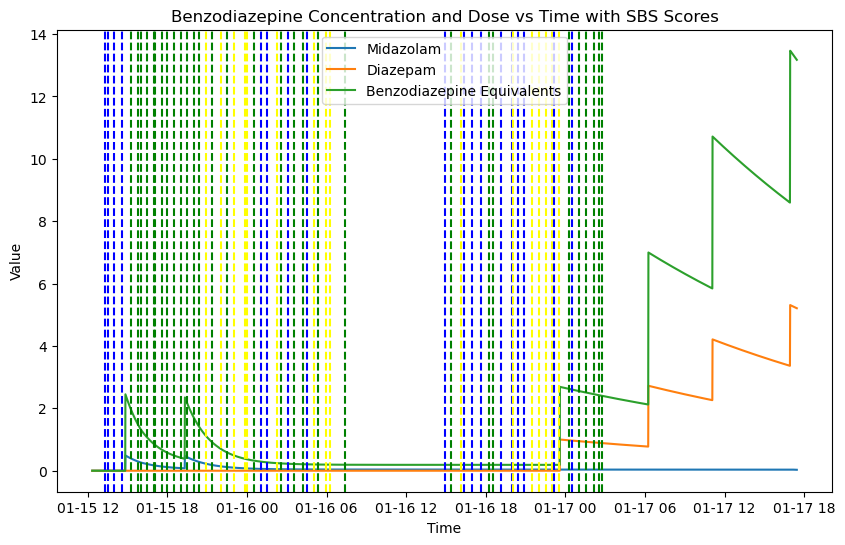

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(midazolam_concentrations['time'], midazolam_concentrations['concentration'], label='Midazolam')
plt.plot(diazepam_concentrations['time'], diazepam_concentrations['concentration'], label='Diazepam')
plt.plot(equiv_concentrations['time'], equiv_concentrations['concentration'], label='Benzodiazepine Equivalents')
for i in range(len(sbs_score_df)):
    if sbs_score_df['TM_SBS'].iloc[i] == -2:
        plt.axvline(x=sbs_score_df['time'].iloc[i], color='blue', linestyle='--')
    elif sbs_score_df['TM_SBS'].iloc[i] == -1:
        plt.axvline(x=sbs_score_df['time'].iloc[i], color='green', linestyle='--')
    elif sbs_score_df['TM_SBS'].iloc[i] == 0:
        plt.axvline(x=sbs_score_df['time'].iloc[i], color='yellow', linestyle='--')
    elif sbs_score_df['TM_SBS'].iloc[i] == 1:
        plt.axvline(x=sbs_score_df['time'].iloc[i], color='orange', linestyle='--')
    elif sbs_score_df['TM_SBS'].iloc[i] == 2:
        plt.axvline(x=sbs_score_df['time'].iloc[i], color='red', linestyle='--')
plt.title('Benzodiazepine Concentration and Dose vs Time with SBS Scores')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [59]:
filtered_mar9_narcotics = filtered_mar9_narcotics[(filtered_mar9_narcotics['time'] >= start) & (filtered_mar9_narcotics['time'] <= end)]
filtered_mar9_narcotics['oral'] = filtered_mar9_narcotics['med_name'].apply(lambda x: 'oral' in x.lower())
display(filtered_mar9_narcotics)

,time,dose,mar_action,med_name,oral
115,2024-01-15 13:00:00,0.0250,['Rate Verify'],['HYDROMORPHONE INFUSION 1 MG/ML IN 50 ML (JHH...,False
116,2024-01-15 13:32:00,0.4925,['Given'],['HYDROMORPHONE BOLUS FROM BAG (JHH PEDS)'],False
117,2024-01-15 14:00:00,0.0250,['Rate Verify'],['HYDROMORPHONE INFUSION 1 MG/ML IN 50 ML (JHH...,False
118,2024-01-15 14:25:00,0.4925,['Given'],['HYDROMORPHONE BOLUS FROM BAG (JHH PEDS)'],False
119,2024-01-15 15:00:00,0.0250,['Rate Verify'],['HYDROMORPHONE INFUSION 1 MG/ML IN 50 ML (JHH...,False
...,...,...,...,...,...
203,2024-01-17 14:00:00,0.0400,['Rate Verify'],['HYDROMORPHONE INFUSION 1 MG/ML IN 50 ML (JHH...,False
204,2024-01-17 15:00:00,0.0400,['Rate Verify'],['HYDROMORPHONE INFUSION 1 MG/ML IN 50 ML (JHH...,False
205,2024-01-17 16:00:00,0.0400,['Rate Verify'],['HYDROMORPHONE INFUSION 1 MG/ML IN 50 ML (JHH...,False
206,2024-01-17 16:10:00,0.7880,['Given'],['HYDROMORPHONE BOLUS FROM BAG (JHH PEDS)'],False


In [60]:
hydromorphone_df = filtered_mar9_narcotics[filtered_mar9_narcotics['med_name'].str.lower().str.contains('hydromorphone')].reset_index(drop=True)
methadone_df = filtered_mar9_narcotics[filtered_mar9_narcotics['med_name'].str.lower().str.contains('methadone')].reset_index(drop=True)

display(hydromorphone_df)
display(methadone_df)

,time,dose,mar_action,med_name,oral
0,2024-01-15 13:00:00,0.0250,['Rate Verify'],['HYDROMORPHONE INFUSION 1 MG/ML IN 50 ML (JHH...,False
1,2024-01-15 13:32:00,0.4925,['Given'],['HYDROMORPHONE BOLUS FROM BAG (JHH PEDS)'],False
2,2024-01-15 14:00:00,0.0250,['Rate Verify'],['HYDROMORPHONE INFUSION 1 MG/ML IN 50 ML (JHH...,False
3,2024-01-15 14:25:00,0.4925,['Given'],['HYDROMORPHONE BOLUS FROM BAG (JHH PEDS)'],False
4,2024-01-15 15:00:00,0.0250,['Rate Verify'],['HYDROMORPHONE INFUSION 1 MG/ML IN 50 ML (JHH...,False
...,...,...,...,...,...
87,2024-01-17 14:00:00,0.0400,['Rate Verify'],['HYDROMORPHONE INFUSION 1 MG/ML IN 50 ML (JHH...,False
88,2024-01-17 15:00:00,0.0400,['Rate Verify'],['HYDROMORPHONE INFUSION 1 MG/ML IN 50 ML (JHH...,False
89,2024-01-17 16:00:00,0.0400,['Rate Verify'],['HYDROMORPHONE INFUSION 1 MG/ML IN 50 ML (JHH...,False
90,2024-01-17 16:10:00,0.7880,['Given'],['HYDROMORPHONE BOLUS FROM BAG (JHH PEDS)'],False


,time,dose,mar_action,med_name,oral
0,2024-01-17 11:03:00,1.97,['Given'],['METHADONE 5 MG/5 ML ORAL SOLUTION (UBER)'],True


In [61]:
narcotics_half_lives = {'hydromorphone': 2.5, 'methadone': 19.5}
narcotics_elimination_rates = {med: np.log(2) / (half_life * 60) for med, half_life in narcotics_half_lives.items()}

hydromorphone_doses = calculate_doses(hydromorphone_df)
methadone_doses = calculate_doses(methadone_df)

display(hydromorphone_doses)
display(methadone_doses)

hydromorphone_concentrations = calculate_concentrations(hydromorphone_doses, narcotics_elimination_rates['hydromorphone'], start, end)
methadone_concentrations = calculate_concentrations(methadone_doses, narcotics_elimination_rates['methadone'], start, end)

display(hydromorphone_concentrations)
display(methadone_concentrations)

,time,dose,continuous_dose,bolus_dose
0,2024-01-15 13:00:00,0.000417,0.000417,0.0
1,2024-01-15 13:01:00,0.000417,0.000417,0.0
2,2024-01-15 13:02:00,0.000417,0.000417,0.0
3,2024-01-15 13:03:00,0.000417,0.000417,0.0
4,2024-01-15 13:04:00,0.000417,0.000417,0.0
...,...,...,...,...
3116,2024-01-17 16:56:00,0.000500,0.000500,0.0
3117,2024-01-17 16:57:00,0.000500,0.000500,0.0
3118,2024-01-17 16:58:00,0.000500,0.000500,0.0
3119,2024-01-17 16:59:00,0.000500,0.000500,0.0


,time,dose,continuous_dose,bolus_dose
0,2024-01-17 11:03:00,1.97,0,1.97


,time,dose,continuous_dose,bolus_dose,concentration
0,2024-01-15 12:20:00,0.0,0.0,0.0,0.000000
1,2024-01-15 12:21:00,0.0,0.0,0.0,0.000000
2,2024-01-15 12:22:00,0.0,0.0,0.0,0.000000
3,2024-01-15 12:23:00,0.0,0.0,0.0,0.000000
4,2024-01-15 12:24:00,0.0,0.0,0.0,0.000000
...,...,...,...,...,...
3182,2024-01-17 17:22:00,0.0,0.0,0.0,0.113252
3183,2024-01-17 17:23:00,0.0,0.0,0.0,0.112730
3184,2024-01-17 17:24:00,0.0,0.0,0.0,0.112210
3185,2024-01-17 17:25:00,0.0,0.0,0.0,0.111693


,time,dose,continuous_dose,bolus_dose,concentration
0,2024-01-15 12:20:00,0.0,0.0,0.0,0.000000
1,2024-01-15 12:21:00,0.0,0.0,0.0,0.000000
2,2024-01-15 12:22:00,0.0,0.0,0.0,0.000000
3,2024-01-15 12:23:00,0.0,0.0,0.0,0.000000
4,2024-01-15 12:24:00,0.0,0.0,0.0,0.000000
...,...,...,...,...,...
3182,2024-01-17 17:22:00,0.0,0.0,0.0,1.573813
3183,2024-01-17 17:23:00,0.0,0.0,0.0,1.572881
3184,2024-01-17 17:24:00,0.0,0.0,0.0,1.571949
3185,2024-01-17 17:25:00,0.0,0.0,0.0,1.571018


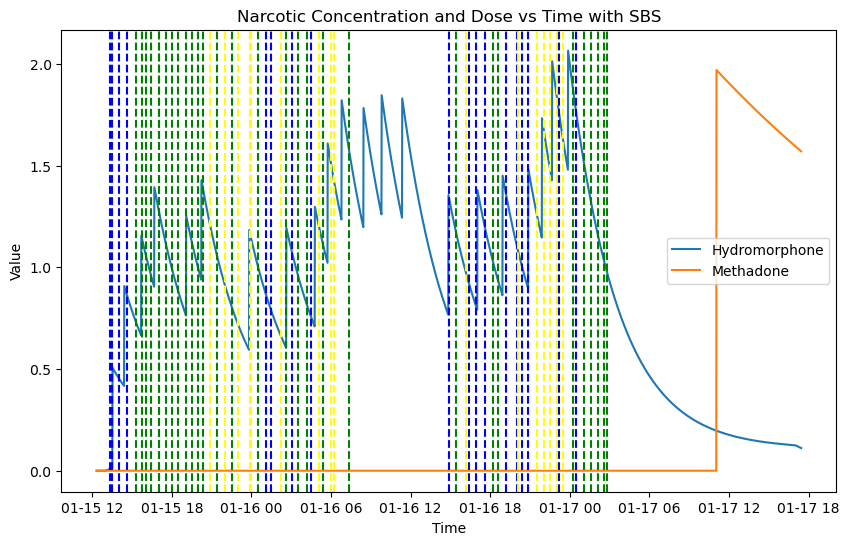

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(hydromorphone_concentrations['time'], hydromorphone_concentrations['concentration'], label='Hydromorphone')
plt.plot(methadone_concentrations['time'], methadone_concentrations['concentration'], label='Methadone')
for i in range(len(sbs_score_df)):
    if sbs_score_df['TM_SBS'].iloc[i] == -2:
        plt.axvline(x=sbs_score_df['time'].iloc[i], color='blue', linestyle='--')
    elif sbs_score_df['TM_SBS'].iloc[i] == -1:
        plt.axvline(x=sbs_score_df['time'].iloc[i], color='green', linestyle='--')
    elif sbs_score_df['TM_SBS'].iloc[i] == 0:
        plt.axvline(x=sbs_score_df['time'].iloc[i], color='yellow', linestyle='--')
    elif sbs_score_df['TM_SBS'].iloc[i] == 1:
        plt.axvline(x=sbs_score_df['time'].iloc[i], color='orange', linestyle='--')
    elif sbs_score_df['TM_SBS'].iloc[i] == 2:
        plt.axvline(x=sbs_score_df['time'].iloc[i], color='red', linestyle='--')
plt.title('Narcotic Concentration and Dose vs Time with SBS')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [63]:
for df in [accel9_sample_standardized, heart_rate_sample_standardized,
           respiratory_rate_sample_standardized, hydromorphone_concentrations]:
    df['time'] = pd.to_datetime(df['time'])

accel_resampled = accel9_sample_standardized.set_index('time').resample('T').mean().rename(columns={'a': 'acceleration'})
hr_resampled = heart_rate_sample_standardized.set_index('time').resample('T').mean()
rr_resampled = respiratory_rate_sample_standardized.set_index('time').resample('T').mean()
midazolam_resampled = midazolam_concentrations.set_index('time')[['concentration']].rename(columns={'concentration': 'midazolam'})
hydromorphone_resampled = hydromorphone_concentrations.set_index('time')[['concentration']].rename(columns={'concentration': 'hydromorphone'})

df_merged = pd.concat([accel_resampled, hr_resampled, rr_resampled, hydromorphone_resampled], axis=1, join='inner')

corr_matrix = df_merged.corr()
display(corr_matrix)

,acceleration,heart_rate,respiratory_rate,hydromorphone
acceleration,1.000000,-0.020375,-0.119104,0.090992
heart_rate,-0.020375,1.000000,-0.205945,-0.424712
respiratory_rate,-0.119104,-0.205945,1.000000,0.299850
hydromorphone,0.090992,-0.424712,0.299850,1.000000


In [81]:
df = sbs_score_df.copy()
df['acceleration'] = np.zeros(len(df))
df['heart_rate'] = np.zeros(len(df))
df['respiratory_rate'] = np.zeros(len(df))
df['benzodiazepine_equivalents'] = np.zeros(len(df))
df['hydromorphone'] = np.zeros(len(df))

for i in range(len(df)):
    time_val = df.loc[i, 'time']
    if time_val in accel_resampled.index:
        df.loc[i, 'acceleration'] = accel_resampled.at[time_val, 'acceleration']
    if time_val in hr_resampled.index:
        df.loc[i, 'heart_rate'] = hr_resampled.at[time_val, 'heart_rate']
    if time_val in rr_resampled.index:
        df.loc[i, 'respiratory_rate'] = rr_resampled.at[time_val, 'respiratory_rate']
    if time_val in benzodiazepine_resampled.index:
        df.loc[i, 'benzodiazepine_equivalents'] = benzodiazepine_resampled.at[time_val, 'benzodiazepine_equivalents']
    if time_val in hydromorphone_resampled.index:
        df.loc[i, 'hydromorphone'] = hydromorphone_resampled.at[time_val, 'hydromorphone']

display(df)

,time,MD_SBS,TM_SBS,SBS,acceleration,heart_rate,respiratory_rate,benzodiazepine_equivalents,hydromorphone
0,2024-01-15 13:19:00,-2,-2,-2,-1.091896,1.689111,0.848678,0.000000,0.007978
1,2024-01-15 13:30:00,-2,-2,-2,-0.892829,-0.256652,0.185787,0.000000,0.012062
2,2024-01-15 14:00:00,-2,-2,-2,0.001089,0.195394,0.185787,0.000000,0.454927
3,2024-01-15 14:36:00,-2,-2,-2,-0.336065,-1.009126,0.623295,0.000000,0.867149
4,2024-01-15 15:16:00,-1,-1,-1,0.620889,0.880482,0.146013,1.944566,0.736060
...,...,...,...,...,...,...,...,...,...
59,2024-01-17 01:02:00,-1,-1,-1,-0.022863,0.349819,-1.325605,2.552619,1.524075
60,2024-01-17 01:34:00,-2,-1,TODO,-0.120061,-0.717121,-0.609682,2.504558,1.329487
61,2024-01-17 02:08:00,-1,-1,-1,-0.173629,-1.371324,-0.609682,2.454563,1.151957
62,2024-01-17 02:33:00,-1,-1,-1,0.463456,0.877674,-0.211948,2.418493,1.038109


In [86]:
df_merged = df.copy()[['TM_SBS', 'SBS', 'acceleration', 'heart_rate', 'respiratory_rate', 'benzodiazepine_equivalents', 'hydromorphone']]

for i in range(len(df)):
    if df_merged.loc[i, 'SBS'] == "TODO":
        df_merged.loc[i, 'SBS'] = np.nan

df_merged = df_merged.dropna()

corr_matrix = df_merged.corr()
display(corr_matrix)

,TM_SBS,SBS,acceleration,heart_rate,respiratory_rate,benzodiazepine_equivalents,hydromorphone
TM_SBS,1.000000,1.000000,0.210311,0.179837,0.146687,0.044219,0.305489
SBS,1.000000,1.000000,0.210311,0.179837,0.146687,0.044219,0.305489
acceleration,0.210311,0.210311,1.000000,0.000022,-0.114741,0.136485,0.379711
heart_rate,0.179837,0.179837,0.000022,1.000000,-0.183047,0.094742,-0.233358
respiratory_rate,0.146687,0.146687,-0.114741,-0.183047,1.000000,-0.061545,-0.146752
benzodiazepine_equivalents,0.044219,0.044219,0.136485,0.094742,-0.061545,1.000000,0.256018
hydromorphone,0.305489,0.305489,0.379711,-0.233358,-0.146752,0.256018,1.000000


In [ ]:
dexmedetomidine_df = filtered_mar9_alpha_agonists[filtered_mar9_alpha_agonists['med_name'].str.lower().str.contains('dexmedetomidine')].reset_index(drop=True)
clonidine_df = filtered_mar9_alpha_agonists[filtered_mar9_alpha_agonists['med_name'].str.lower().str.contains('clonidine')].reset_index(drop=True)

display(dexmedetomidine_df)
display(clonidine_df)

,time,dose,mar_action,med_name
0,2024-01-12 19:00:00,9.9,['Given'],['DEXMEDETOMIDINE BOLUS FROM BAG (JHH PEDS)']
1,2024-01-12 19:19:00,0.3,['New Bag'],['DEXMEDETOMIDINE INFUSION 4 MCG/ML (JHH PED)']
2,2024-01-12 19:53:00,0.3,['Handoff '],['DEXMEDETOMIDINE INFUSION 4 MCG/ML (JHH PED)']
3,2024-01-12 20:00:00,0.3,['Rate Verify'],['DEXMEDETOMIDINE INFUSION 4 MCG/ML (JHH PED)']
4,2024-01-12 20:15:00,0.7,['Rate Change'],['DEXMEDETOMIDINE INFUSION 4 MCG/ML (JHH PED)']
5,2024-01-12 21:00:00,0.7,['Rate Verify'],['DEXMEDETOMIDINE INFUSION 4 MCG/ML (JHH PED)']
6,2024-01-12 22:00:00,0.7,['Rate Verify'],['DEXMEDETOMIDINE INFUSION 4 MCG/ML (JHH PED)']
7,2024-01-12 23:00:00,0.7,['Rate Verify'],['DEXMEDETOMIDINE INFUSION 4 MCG/ML (JHH PED)']
8,2024-01-13 00:00:00,0.7,['Rate Verify'],['DEXMEDETOMIDINE INFUSION 4 MCG/ML (JHH PED)']
9,2024-01-13 00:20:00,0.7,['Rate Verify'],['DEXMEDETOMIDINE INFUSION 4 MCG/ML (JHH PED)']


,time,dose,mar_action,med_name
0,2024-01-23 10:05:00,23.6,['Given'],['CLONIDINE 20 MCG/ML ORAL SUSPENSION']
1,2024-01-23 16:03:00,23.6,['Given'],['CLONIDINE 20 MCG/ML ORAL SUSPENSION']
2,2024-01-23 22:33:00,23.6,['Given'],['CLONIDINE 20 MCG/ML ORAL SUSPENSION']
3,2024-01-24 04:09:00,23.6,['Given'],['CLONIDINE 20 MCG/ML ORAL SUSPENSION']
4,2024-01-24 09:33:00,23.6,['Given'],['CLONIDINE 20 MCG/ML ORAL SUSPENSION']


In [25]:
start = accel9['time'].iloc[0]
end = accel9['time'].iloc[-1]

alpha_agonists_half_lives = {'dexmedetomidine': 2, 'clonidine': 1.25}
alpha_agonists_elimination_rates = {med: np.log(2) / (half_life * 60) for med, half_life in alpha_agonists_half_lives.items()}

dexmedetomidine_doses = calculate_doses(dexmedetomidine_df)
clonidine_doses = calculate_doses(clonidine_df)

dexmedetomidine_concentrations = calculate_concentrations(dexmedetomidine_doses, alpha_agonists_elimination_rates['dexmedetomidine'], start, end)
clonidine_concentrations = calculate_concentrations(clonidine_doses, alpha_agonists_elimination_rates['clonidine'], start, end)

display(dexmedetomidine_concentrations)
display(clonidine_concentrations)

,time,dose,continuous_dose,bolus_dose,concentration
0,2024-01-15 12:20:00,0.0,0.0,0.0,0.0
1,2024-01-15 12:21:00,0.0,0.0,0.0,0.0
2,2024-01-15 12:22:00,0.0,0.0,0.0,0.0
3,2024-01-15 12:23:00,0.0,0.0,0.0,0.0
4,2024-01-15 12:24:00,0.0,0.0,0.0,0.0
...,...,...,...,...,...
3182,2024-01-17 17:22:00,0.0,0.0,0.0,0.0
3183,2024-01-17 17:23:00,0.0,0.0,0.0,0.0
3184,2024-01-17 17:24:00,0.0,0.0,0.0,0.0
3185,2024-01-17 17:25:00,0.0,0.0,0.0,0.0


,time,dose,continuous_dose,bolus_dose,concentration
0,2024-01-15 12:20:00,0.0,0.0,0.0,0.0
1,2024-01-15 12:21:00,0.0,0.0,0.0,0.0
2,2024-01-15 12:22:00,0.0,0.0,0.0,0.0
3,2024-01-15 12:23:00,0.0,0.0,0.0,0.0
4,2024-01-15 12:24:00,0.0,0.0,0.0,0.0
...,...,...,...,...,...
3182,2024-01-17 17:22:00,0.0,0.0,0.0,0.0
3183,2024-01-17 17:23:00,0.0,0.0,0.0,0.0
3184,2024-01-17 17:24:00,0.0,0.0,0.0,0.0
3185,2024-01-17 17:25:00,0.0,0.0,0.0,0.0


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dexmedetomidine_concentrations['time'], dexmedetomidine_concentrations['concentration'], label='Dexmedetomidine')
plt.plot(clonidine_concentrations['time'], clonidine_concentrations['concentration'], label='Clonidine')
for i in range(len(sbs_score_df)):
    if sbs_score_df['TM_SBS'].iloc[i] == -2:
        plt.axvline(x=sbs_score_df['time'].iloc[i], color='blue', linestyle='--')
    elif sbs_score_df['TM_SBS'].iloc[i] == -1:
        plt.axvline(x=sbs_score_df['time'].iloc[i], color='green', linestyle='--')
    elif sbs_score_df['TM_SBS'].iloc[i] == 0:
        plt.axvline(x=sbs_score_df['time'].iloc[i], color='yellow', linestyle='--')
    elif sbs_score_df['TM_SBS'].iloc[i] == 1:
        plt.axvline(x=sbs_score_df['time'].iloc[i], color='orange', linestyle='--')
    elif sbs_score_df['TM_SBS'].iloc[i] == 2:
        plt.axvline(x=sbs_score_df['time'].iloc[i], color='red', linestyle='--')
plt.title('Alpha Agonist Concentration and Dose vs Time with SBS')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()